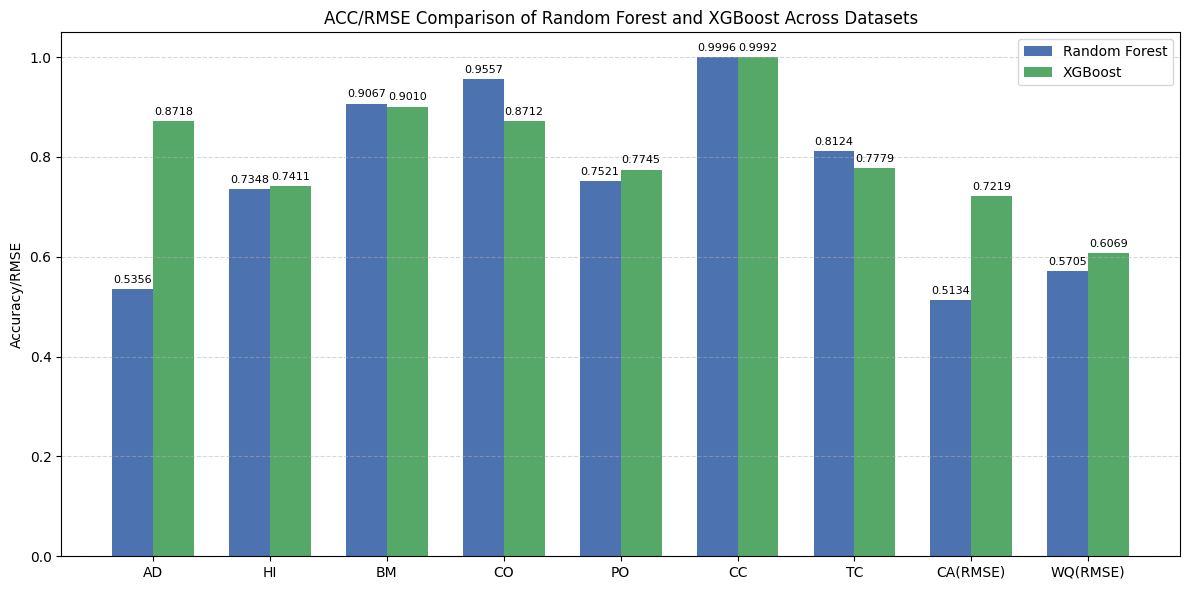

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

datasets = [
    "AD", "HI", "BM", "CO", "PO", "CC", "TC", "CA(RMSE)", "WQ(RMSE)"
]

rf_accuracy = [0.5356, 0.7348, 0.9067, 0.9557, 0.7521, 0.9996, 0.8124, 0.5134, 0.5705]
xgb_accuracy = [0.8718, 0.7411, 0.9010, 0.8712, 0.7745, 0.9992, 0.7779, 0.7219, 0.6069]

x = np.arange(len(datasets)) 
width = 0.35 


fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, rf_accuracy, width, label='Random Forest', color='#4C72B0')
bars2 = ax.bar(x + width/2, xgb_accuracy, width, label='XGBoost', color='#55A868')

ax.set_ylabel('Accuracy/RMSE')
ax.set_title('ACC/RMSE Comparison of Random Forest and XGBoost Across Datasets')
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.legend()


for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
